# Features: lake

In this notebook, we compute the distance from each station to the Lac Léman (extracted from the OpenStreetMap).

In [ ]:
import contextily as cx
import geopandas as gpd
import osmnx as ox

In [ ]:
stations_gdf_filepath = "../data/interim/stations.gpkg"
lake_nominatim_query = "Lac Leman"
dst_filepath = "../data/interim/lake-features.csv"

In [ ]:
stations_gdf = gpd.read_file(stations_gdf_filepath)
station_id_col = stations_gdf.columns.drop("geometry")[0]
stations_gdf = stations_gdf.set_index(station_id_col)

In [ ]:
lake_extent_geom = (
    ox.geocode_to_gdf(lake_nominatim_query).to_crs(stations_gdf.crs)["geometry"].iloc[0]
)

In [ ]:
distance_ser = stations_gdf.distance(lake_extent_geom).rename("lake_dist")

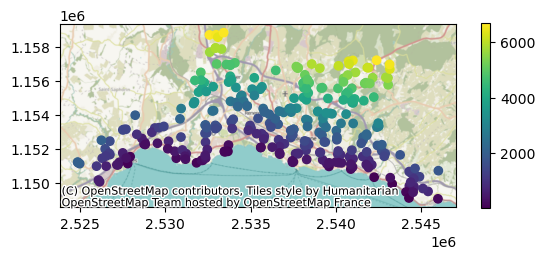

In [ ]:
ax = stations_gdf.assign(dist_lake=distance_ser).plot(
    "dist_lake", legend=True, legend_kwds={"shrink": 0.5}
)
cx.add_basemap(ax, crs=stations_gdf.crs)

In [ ]:
# dump to csv
distance_ser.to_csv(dst_filepath)